In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# BODE plot for error angle

In [3]:
pilifer_signal = np.load('./dataFolder/TangentErrorAngle_smoothened.npy')

Text(0, 0.5, 'Proboscis Base deflection (degrees)')

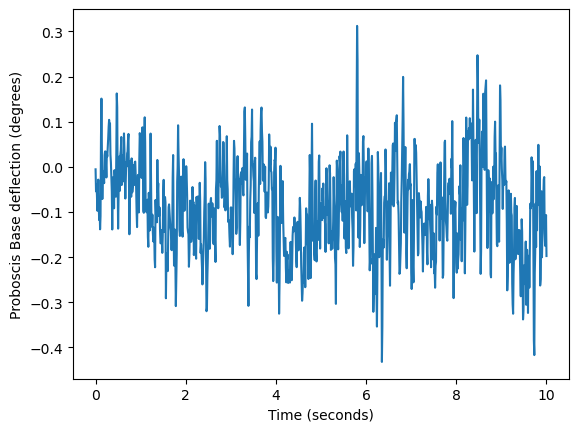

In [4]:
f = 100
t = 1/100

time = np.arange(len(pilifer_signal))*t
plt.plot(time, pilifer_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Proboscis Base deflection (degrees)')

In [5]:
trackPoints = pd.read_csv('./dataFolder/MV_m1_points.csv')
trackPoints.head()

body_X      body_Y   nectary_X   nectary_Y  prob_base_X  prob_base_Y  \
0  388.078376  381.614068  372.227746  188.424715   381.619192   323.795071   
1  386.810000  386.980000  372.970000  188.000000   381.348241   327.728714   
2  383.100000  379.100000  373.950000  188.010000   378.548415   321.217857   
3  379.238602  381.156274  374.930000  188.010000   377.155303   323.250858   
4  378.700000  379.270000  374.940000  188.010000   376.495312   316.354012   

   prob_mid_X  prob_mid_Y    prob_1_X    prob_1_Y    prob_2_X    prob_2_Y  \
0  380.238266  277.537139  381.059690  314.190856  381.198874  307.238159   
1  379.416841  278.019424  380.405303  320.557345  380.743042  310.449771   
2  379.950000  278.000000  378.337121  315.709023  378.463881  309.847593   
3  376.815665  278.019424  377.226377  314.914284  378.008049  309.245416   
4  377.010000  278.000000  377.363281  312.985141  376.640553  306.635981   

     prob_3_X    prob_3_Y    prob_4_X    prob_4_Y    prob_5_X    prob_5_Y  
0  381.084916  300.212757  380.799242  293.442655  380.405303  287.157793  
1  380.743042  302.621466  380.306818  295.597465  380.208333  288.594333  
2  378.691797  301.216386  379.125000  295.238330  379.223485  286.080388  
3  377.096385  301.216386  377.253788  295.597465  376.859848  287.696495  
4  376.754511  300.614209  376.465909  294.699627  376.958333  287.157793

In [6]:
body_vector = trackPoints.loc[:,['body_X', 'body_Y']].values
body_pos = np.linalg.norm(body_vector, axis = 1)

nectary_vector = trackPoints.loc[:,['nectary_X', 'nectary_Y']]
nectary_pos = np.linalg.norm(nectary_vector, axis = 1)

In [68]:
len(body_pos), len(nectary_pos), len(pilifer_signal)

(1000, 1000, 1001)

Text(0, 0.5, 'Proboscis angle (in degree)')

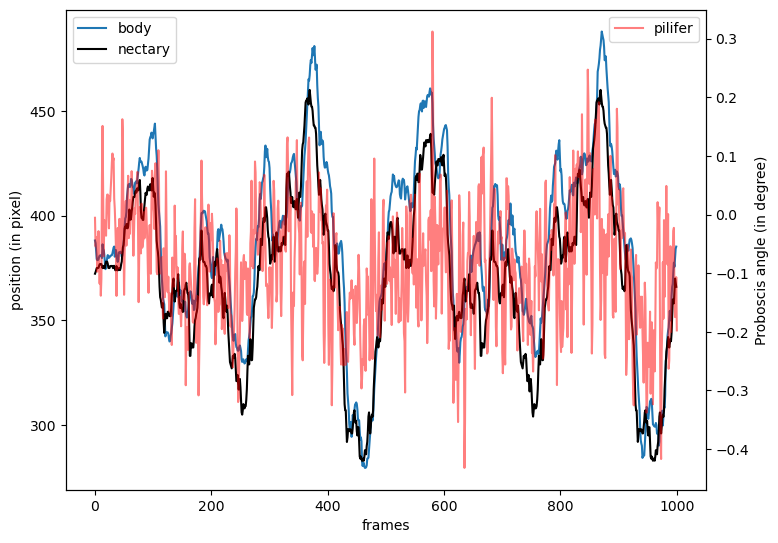

In [7]:
f = plt.figure()
ax = f.add_axes([0,0,1,1])
body_lateral = trackPoints.loc[:,'body_X']
nectary_lateral = trackPoints.loc[:,'nectary_X']
plt.plot(body_lateral, label = 'body')
plt.plot(nectary_lateral, 'k', label = 'nectary')
plt.legend()
plt.ylabel('position (in pixel)')
plt.xlabel('frames')

ax2 = ax.twinx()
ax2.plot(pilifer_signal, 'r', label = 'pilifer', alpha = 0.5)
plt.legend()
ax2.set_ylabel('Proboscis angle (in degree)')
# ax2.ylabel('proboscis angle (degree))')

In [8]:
freq_axis = np.fft.fftfreq(len(nectary_lateral), 1/100)
fft_nectary = np.fft.fft(nectary_lateral)
fft_body = np.fft.fft(body_lateral)
fft_pilifer = np.fft.fft(pilifer_signal)

L = len(nectary_lateral) 

nect_Amplitude = abs(fft_nectary)/L # normalize by length of signal
nect_half_sided_amplitude = 2*nect_Amplitude[0:round(L/2)-1]

body_Amplitude = abs(fft_body)/L # normalize by length of signal
body_half_sided_amplitude = 2*nect_Amplitude[0:round(L/2)-1]

pilifer_Amplitude = abs(fft_pilifer)/L # normalize by length of signal
pilifer_half_sided_amplitude = 2*pilifer_Amplitude[0:round(L/2)-1]

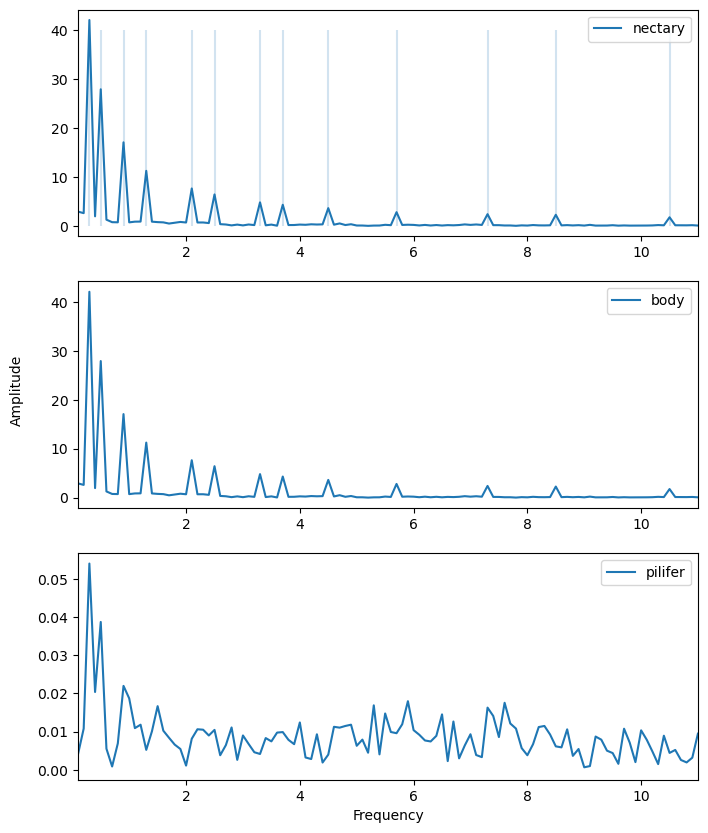

In [59]:
f, ax = plt.subplots(3,1, figsize = (8,10))
ax[0].plot(freq_axis[0:round(L/2)-1], nect_half_sided_amplitude, label = 'nectary')
# semilogx(freq_axis[1:round(L/2)], nect_half_sided_amplitude, label = 'nectary', base = 10)
ax[0].legend()
ax[1].plot(freq_axis[0:round(L/2)-1], body_half_sided_amplitude, label = 'body')
# semilogx(freq_axis[1:round(L/2)], body_half_sided_amplitude, label = 'body')
ax[1].legend()
ax[2].plot(freq_axis[0:round(L/2)-1], pilifer_half_sided_amplitude, label = 'pilifer')
# semilogx(freq_axis[1:round(L/2)], pilifer_half_sided_amplitude, label = 'pilifer')
ax[2].legend()

freq_Axes = freq_axis[0:round(L/2)-1]
lines = freq_Axes[signal.find_peaks(nect_half_sided_amplitude, prominence = 1)[0]]
ax[0].vlines(lines, ymin = 0, ymax = 40, alpha = .2)
# plt.xlim(0,14)
f.text(0.04, 0.5, 'Amplitude', va='center', rotation='vertical')
ax[2].set_xlabel('Frequency')
# f.text(0.5, 0.04, 'Frequency (log scale)', va='left', rotation='horizontal')
for axes in ax:
    axes.set_xlim(0.1,11)

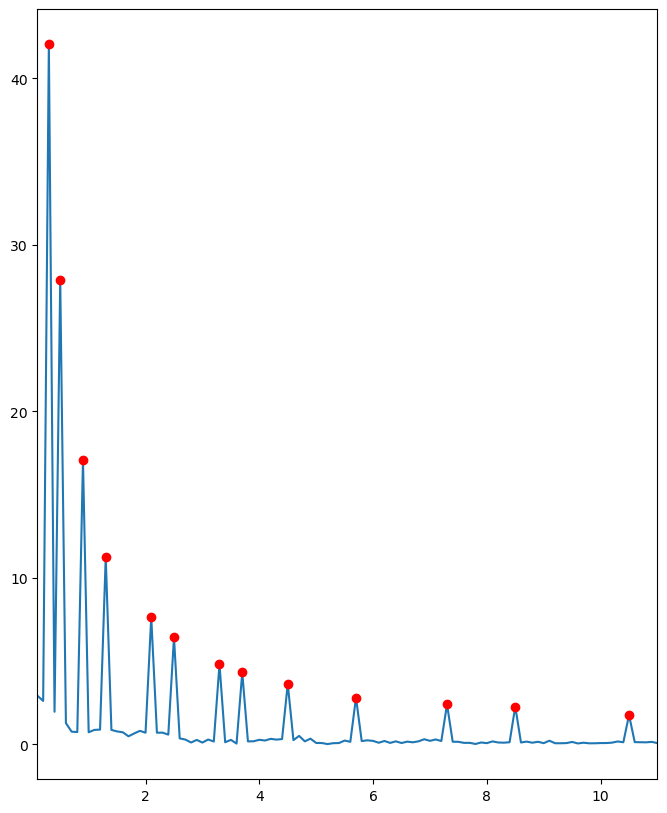

In [55]:
f = plt.figure(figsize = (8,10))
plt.plot(freq_axis[0:round(L/2)-1], nect_half_sided_amplitude, label = 'nectary')
plt.xlim(0.1,11)
plt.plot(freq_axis[signal.find_peaks(nect_half_sided_amplitude, prominence = 1)[0]],
        nect_half_sided_amplitude[signal.find_peaks(nect_half_sided_amplitude, prominence = 1)[0]],
        'or')

# generate the transfer function and Bode Plot

In [69]:
body_error_func = fft_body/fft_nectary
pilifer_error_func = fft_pilifer[0:-1]/fft_nectary

In [96]:
fft_body[0:2], fft_nectary[0:2], body_error_func[0:2]

(array([386085.45709      +0.j        ,  -2155.18992808+2453.04001302j]),
 array([370690.877746    +0.j        ,  -1372.78241359+503.46092148j]),
 array([1.04152943+0.j       , 1.96146299-1.0675545j]))

(-10.0, 10.0)

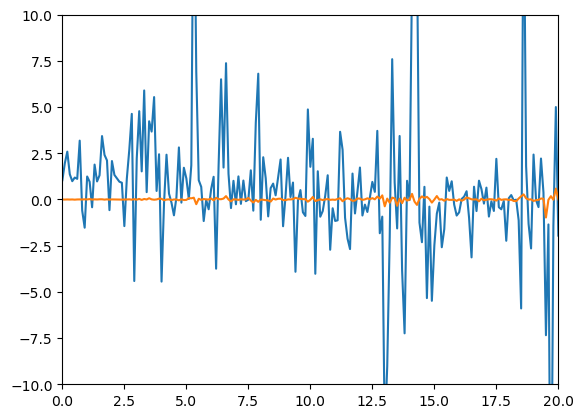

In [109]:
# transfer function - fft plot the function itself

plt.plot(freq_axis[0:round(L/2)-1], body_error_func[0:round(L/2)-1])
plt.plot(freq_axis[0:round(L/2)-1], pilifer_error_func[0:round(L/2)-1])
plt.xlim([0,20])
plt.ylim([-10,10])

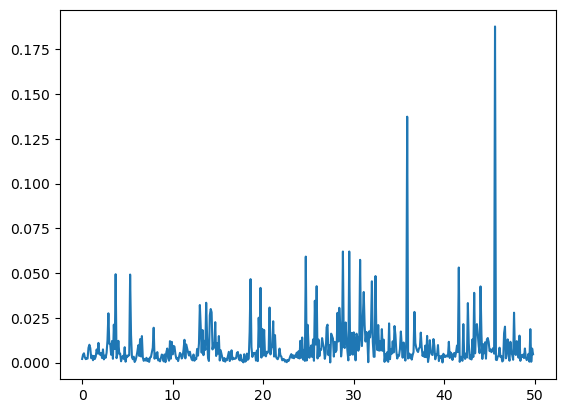

In [105]:
mag_transfer_body = 2*abs(body_error_func)/L
plt.plot(freq_Axes[0:round(L/2)-1], mag_transfer_body[0:round(L/2)-1])